In [2]:
library(Seurat)
library(tidyverse)
library(Matrix)
library(scales)
library(cowplot)
library(RCurl)

Attaching SeuratObject

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘RCurl’


The following object is masked 

In [3]:
# read in data, including all complexity
path <- "SeuratOut/integrated-allcomplexity-clustered.rds"
data <- readRDS(path)
DefaultAssay(data) <- "RNA"

In [4]:
secretory <- subset(data, ident = c("0","3", "4", "13", "17","18"))
basal <- subset(data,ident = c("1","11")) # may not be diff/interesting
mesoderm <- subset(data,ident=c("2","6","7","9","16"))
secretory <- DietSeurat(secretory, assays = "RNA")
basal <- DietSeurat(basal, assays = "RNA")
mesoderm <- DietSeurat(mesoderm, assays = "RNA")

In [5]:
# sct transform
data <- mesoderm
split_ob <- SplitObject(data,split.by='orig.ident')
for (i in 1:length(split_ob)){
    split_ob[[i]] <- NormalizeData(split_ob[[i]],verbose=TRUE)
    split_ob[[i]] <- SCTransform(split_ob[[i]],vars.to.regress=c('mitoRatio'))
}
Top3000Features <- SelectIntegrationFeatures(object.list=split_ob,nfeatures=3000)
split_ob <- PrepSCTIntegration(object.list=split_ob,anchor.features=Top3000Features)
# identify anchors, or mutual nearest neighbors (MNNs) across samples 'best buddies'
    # best buddies in reciproal analysis will be used as anchors to 'merge' two groups 
    # filter anchors by overlapping their neighborhood cells (-> if good anchors, their neighborhood cells should be similar too)
anchors <- FindIntegrationAnchors(object.list=split_ob,normalization.method='SCT',anchor.features=Top3000Features)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 5860 by 88

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 88 cells



  |======================================================================| 100%


Found 56 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 5860 genes



  |======================================================================| 100%


Computing corrected count matrix for 5860 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.278461 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 9166 by 251

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 251 cells



  |======================================================================| 100%


Found 81 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 9166 genes



  |======================================================================| 100%


Computing corrected count matrix for 9166 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 3.450203 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 5503 by 80

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 80 cells



  |======================================================================| 100%


Found 45 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 5503 genes



  |======================================================================| 100%


Computing corrected count matrix for 5503 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.744197 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 7497 by 125

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 125 cells



  |======================================================================| 100%


Found 98 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 7497 genes



  |======================================================================| 100%


Computing corrected count matrix for 7497 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.260224 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 8158 by 128

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 128 cells



  |======================================================================| 100%


Found 79 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 8158 genes



  |======================================================================| 100%


Computing corrected count matrix for 8158 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.252867 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 8234 by 172

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 172 cells



  |======================================================================| 100%


Found 72 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 8234 genes



  |======================================================================| 100%


Computing corrected count matrix for 8234 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.673964 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 7893 by 147

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 147 cells



  |======================================================================| 100%


There are 1 estimated thetas smaller than 1e-07 - will be set to 1e-07

Found 88 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 7893 genes



  |======================================================================| 100%


Computing corrected count matrix for 7893 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.474923 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 7987 by 181

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 181 cells



  |======================================================================| 100%


Found 87 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 7987 genes



  |======================================================================| 100%


Computing corrected count matrix for 7987 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.744073 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 7679 by 138

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 138 cells



  |======================================================================| 100%


Found 111 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 7679 genes



  |======================================================================| 100%


Computing corrected count matrix for 7679 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.33307 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 8710 by 199

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 199 cells



  |======================================================================| 100%


Found 110 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 8710 genes



  |======================================================================| 100%


Computing corrected count matrix for 8710 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.888631 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 11079 by 702

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 702 cells



  |======================================================================| 100%


Found 89 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 11079 genes



  |======================================================================| 100%


Computing corrected count matrix for 11079 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 8.40054 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 10299 by 362

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 362 cells



  |======================================================================| 100%


Found 77 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 10299 genes



  |======================================================================| 100%


Computing corrected count matrix for 10299 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 5.054511 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 8895 by 319

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 319 cells



  |======================================================================| 100%


Found 68 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 8895 genes



  |======================================================================| 100%


Computing corrected count matrix for 8895 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 4.489075 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 3698 by 51

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 51 cells



  |======================================================================| 100%


Found 113 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 3698 genes



  |======================================================================| 100%


Computing corrected count matrix for 3698 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.586621 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 8696 by 303

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 303 cells



  |======================================================================| 100%


Found 86 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 8696 genes



  |======================================================================| 100%


Computing corrected count matrix for 8696 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 4.497152 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 6422 by 150

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 150 cells



  |======================================================================| 100%


Found 95 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 6422 genes



  |======================================================================| 100%


Computing corrected count matrix for 6422 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.432467 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 6900 by 158

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 158 cells



  |======================================================================| 100%


Found 99 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 6900 genes



  |======================================================================| 100%


Computing corrected count matrix for 6900 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.557616 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 7850 by 239

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 239 cells



  |======================================================================| 100%


Found 115 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 7850 genes



  |======================================================================| 100%


Computing corrected count matrix for 7850 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 3.465075 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 13161 by 2721

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 2721 cells



  |======================================================================| 100%


Found 138 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 13161 genes



  |======================================================================| 100%


Computing corrected count matrix for 13161 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 32.96074 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 12848 by 3054

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3054 cells



  |======================================================================| 100%


Found 122 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 12848 genes



  |======================================================================| 100%


Computing corrected count matrix for 12848 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 36.17023 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 9937 by 1218

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 1218 cells



  |======================================================================| 100%


Found 123 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 9937 genes



  |======================================================================| 100%


Computing corrected count matrix for 9937 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 14.40268 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 9797 by 1374

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 1374 cells



  |======================================================================| 100%


Found 125 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 9797 genes



  |======================================================================| 100%


Computing corrected count matrix for 9797 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 15.9711 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 9117 by 1134

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 1134 cells



  |======================================================================| 100%


Found 137 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 9117 genes



  |======================================================================| 100%


Computing corrected count matrix for 9117 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 13.06125 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 439 anchors

Filtering anchors

Warning message in FilterAnchors(object = object.pair, assay = assay, slot = slot, :
“Number of anchor cells is less than k.filter. Retaining all anchors.”
Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 354 anchors

Filtering anchors

Warning message in FilterAnchors(object = object.pair, assay = assay, slot = slot, :
“Number of anchor cells is less than k.filter. Retaining all anchors.”
Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 400 anchors

Filtering anchors

Warning message in FilterAnchors(object = object.pair, assay = assay, slot = slot, :
“Number of anch

In [6]:
# cell types only present in one sample will remain sample-specific!
# k.weight has to be small (since some samples have low cell count)
data <- IntegrateData(anchorset = anchors, normalization.method='SCT',k.weight=10)
data <- FindVariableFeatures(data, selection.method='vst',nfeatures=3000)
top10 <- head(VariableFeatures(data),10)
plot1 <- VariableFeaturePlot(data)
plot2 <- LabelPoints(plot=plot1,points=top10,repel=TRUE)

Merging dataset 1 into 11

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 3 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 14 into 4

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 4 14 into 19

Warning message:
“Attempting to merge an SCTAssay with another Assay type 
Converting all to standard Assay objects.”
Extracting anchors for merged samples

Warning message:
“Attempting to merge an SCTAssay with another Assay type 
Converting all to standard Assay objects.”
Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 5 into 20

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 6

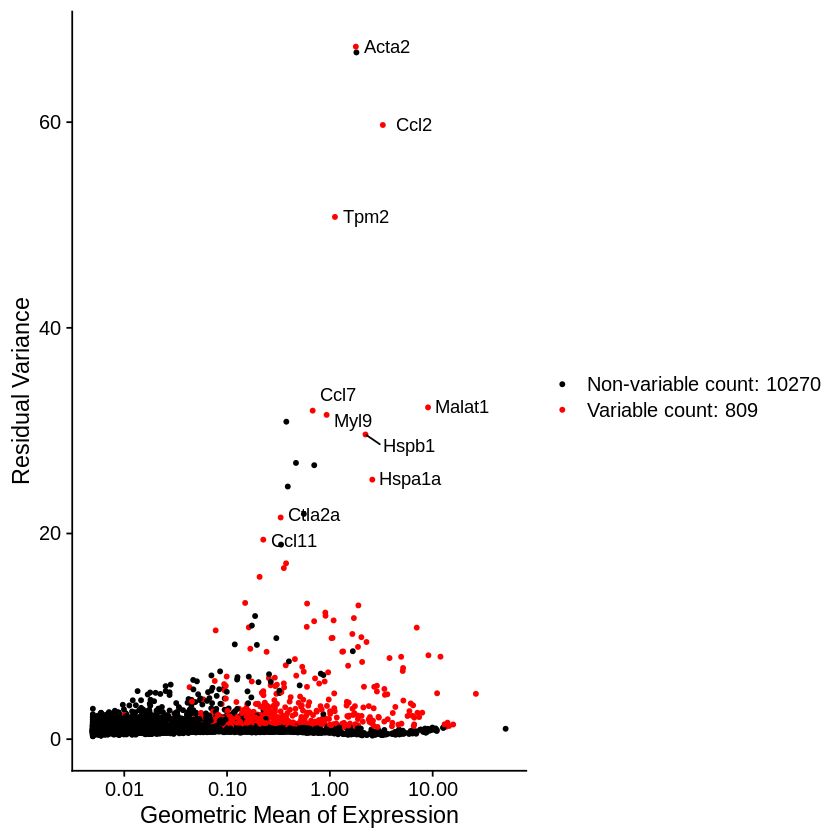

In [7]:
plot2

In [8]:
data <- RunPCA(data,features=VariableFeatures(object=data))

PC_ 1 
Positive:  Gsn, Dcn, Ccl2, Mt2, Cxcl1, Thbs1, Ccl7, Dpt, Serping1, Fbln1 
	   Col3a1, Col1a2, Igfbp3, Lum, Col1a1, Sparc, Ogn, Il6, Ccdc80, Col6a1 
	   Uap1, Plat, Gfpt2, Icam1, Ugdh, Hspa5, Sfrp1, H2-K1, Igf1, Ccl11 
Negative:  Myl9, Acta2, Tpm2, Csrp1, Mylk, Tpm1, Myl6, Ckb, Des, Ndufa4 
	   Flna, Cald1, Dstn, Synm, Msrb1, Synpo2, Cdc42ep3, Actb, Cav1, Cox6c 
	   Gm13889, Uqcr11, Defb1, Ppp1r12a, Selenow, Tns1, Ccdc107, Gadd45g, Smtn, Cpe 
PC_ 2 
Positive:  Rorb, Malat1, Wif1, Nbl1, Wnt2, Ifitm1, Fos, Egr1, Junb, Hspa1a 
	   Gas6, Mgp, Sfrp2, Sema5a, Srd5a2, Nsmce3, Lgals1, Dnaja1, Ier3, Hspe1 
	   Bmp2, Hsph1, Rhob, Pten, Hspa8, Hspd1, Bmp4, Enpp2, Tcf4, Timp3 
Negative:  Gsn, Dcn, Ogn, Dpt, Lum, Sparcl1, Ccdc80, Ccl7, Tmsb10, Col3a1 
	   Serping1, Fbln1, Sparc, Actg1, Uap1, Ccl2, Col6a3, Ugdh, Acta2, Sfrp1 
	   Myl6, Metrnl, Ccl11, Fst, Thbs1, Tpm2, Actb, Gfpt2, Fn1, Myl9 
PC_ 3 
Positive:  Mt2, Fth1, Ccl2, Ifitm1, Arpc1b, Tmsb4x, Adamts4, Osmr, Nbl1, Il1r1 
	   Pqlc1, Mgp, 

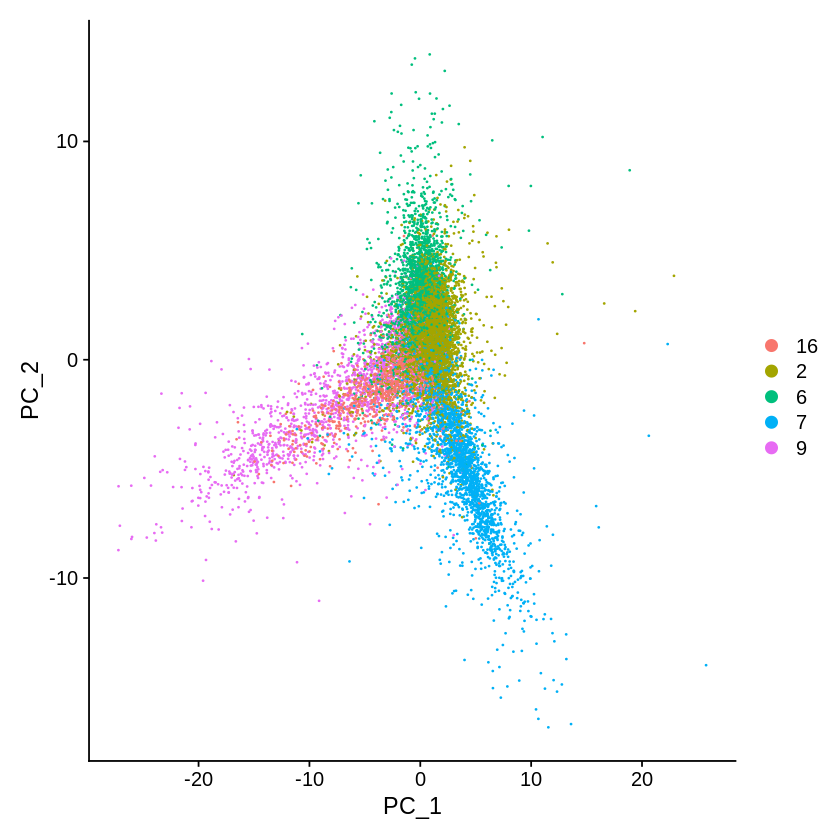

In [9]:
# DimPlot(data, reduction='pca')
DimPlot(data, reduction='pca')

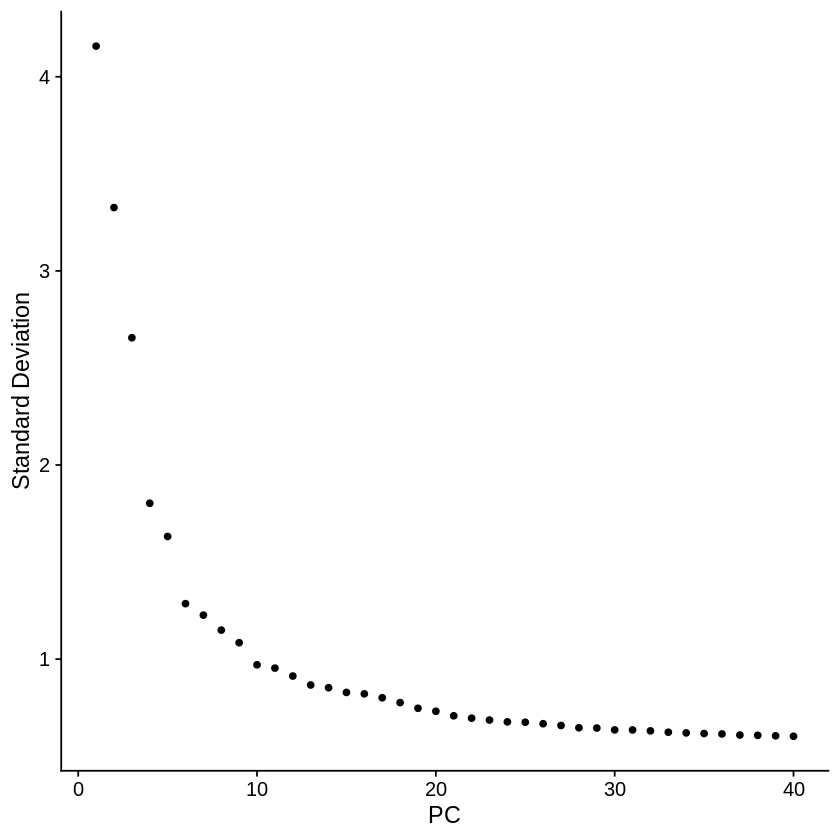

In [10]:
ElbowPlot(data,ndim=40)

In [11]:
# cluster the cells
data <- FindNeighbors(data, dims=1:30)
data <- FindClusters(data, resolution = c(0.1,0.2,0.4,0.6,0.8,1.0,1.4))
# visualize in UMAP
data <- RunUMAP(data, dims=1:30,n.neighbors=30,min.dist=0.2)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13294
Number of edges: 579275

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9246
Number of communities: 4
Elapsed time: 2 seconds


1 singletons identified. 3 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13294
Number of edges: 579275

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8959
Number of communities: 5
Elapsed time: 2 seconds


1 singletons identified. 4 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13294
Number of edges: 579275

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8452
Number of communities: 8
Elapsed time: 1 seconds


1 singletons identified. 7 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13294
Number of edges: 579275

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8107
Number of communities: 11
Elapsed time: 2 seconds


1 singletons identified. 10 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13294
Number of edges: 579275

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7848
Number of communities: 12
Elapsed time: 2 seconds


1 singletons identified. 11 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13294
Number of edges: 579275

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7642
Number of communities: 14
Elapsed time: 2 seconds


1 singletons identified. 13 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13294
Number of edges: 579275

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7339
Number of communities: 18
Elapsed time: 2 seconds


1 singletons identified. 17 final clusters.

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
22:51:26 UMAP embedding parameters a = 1.262 b = 1.003

22:51:26 Read 13294 rows and found 30 numeric columns

22:51:26 Using Annoy for neighbor search, n_neighbors = 30

22:51:26 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:51:28 Writing NN index file to temp file /tmp/RtmpAxOuSN/file2c1a2b23267f71

22:51:28 Searching Annoy index using 1 thread, search_k = 3000

22:51:32 Annoy recall = 100%

22:51:33 Commencing smooth kNN distance calibr

Loading required package: ggraph



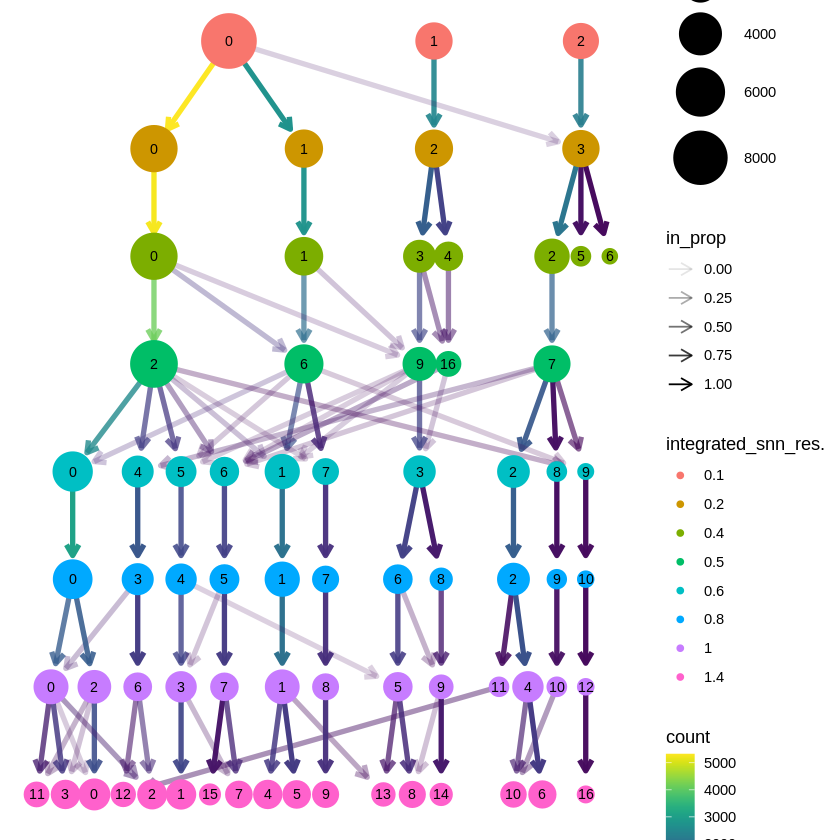

In [12]:
library(clustree)
clustree(data,prefix="integrated_snn_res.")

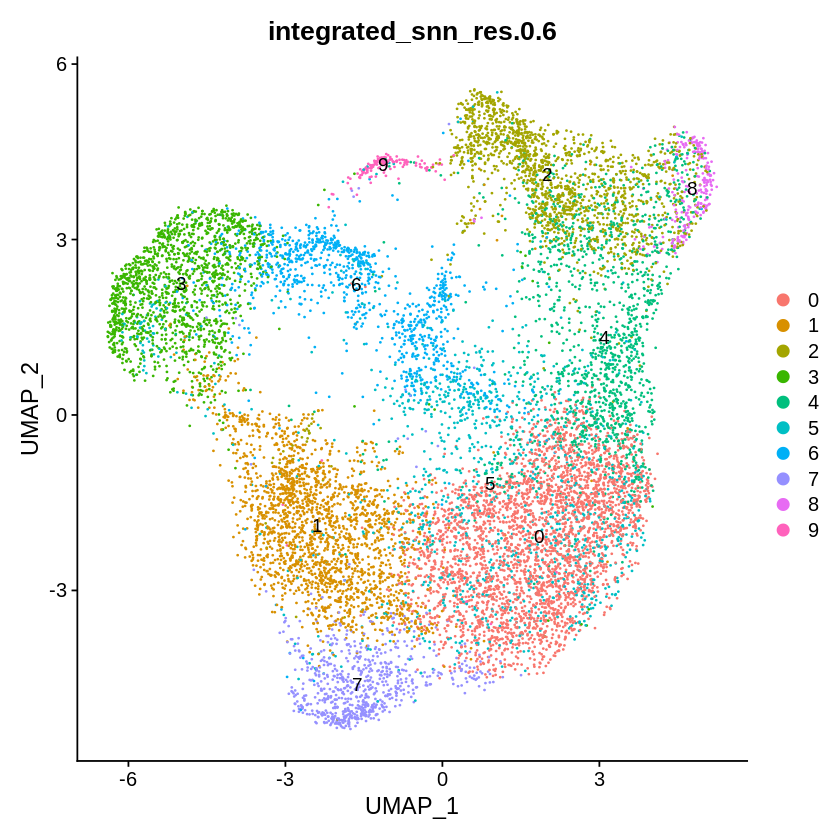

In [13]:
DimPlot(data, reduction='umap',label=TRUE,group.by="integrated_snn_res.0.6")

Warning message:
“The sort.cell parameter is being deprecated. Please use the order parameter instead for equivalent functionality.”


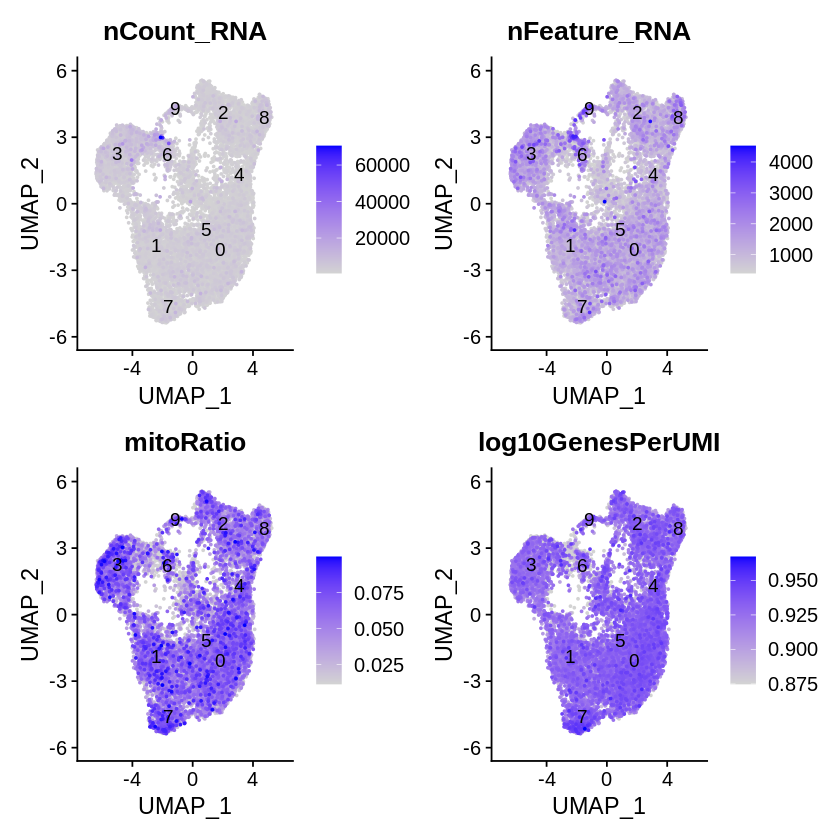

In [14]:
# 0.6??
Idents(data) <- "integrated_snn_res.0.6"
metric <- c('nCount_RNA','nFeature_RNA','mitoRatio','log10GenesPerUMI')
FeaturePlot(data,reduction='umap',
            features=metric,pt.size=0.4,
            sort.cell=TRUE,min.cutoff='q10',label=TRUE)

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


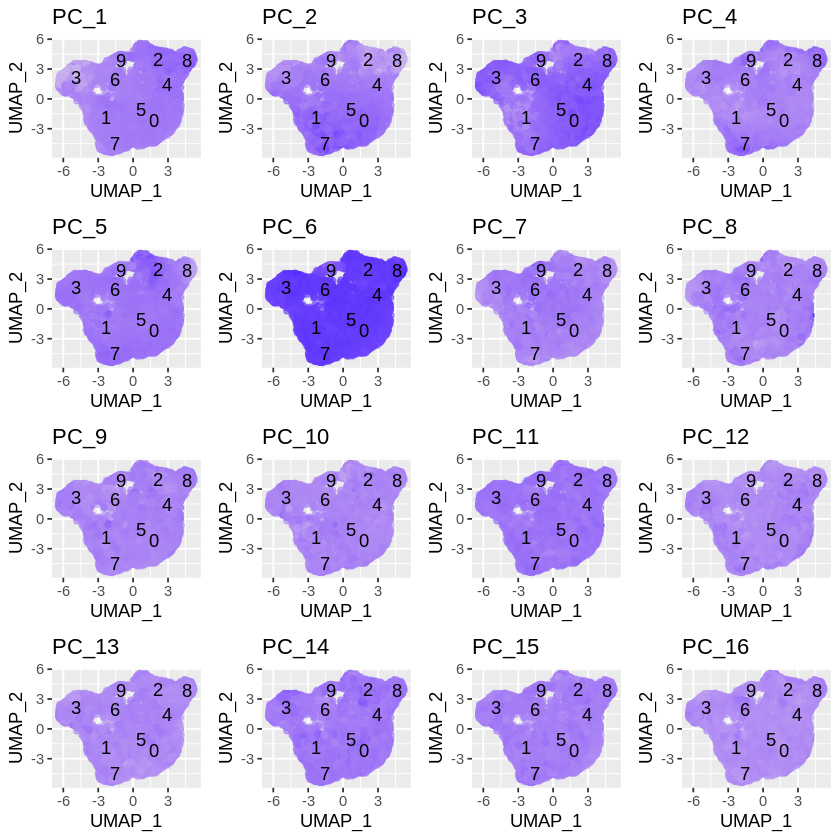

In [15]:
# see how PC (linear space) seperate the clusters/cell types
columns <- c(paste0("PC_", 1:16),
            'ident',
            'UMAP_1',
            'UMAP_2')
pc_data <- FetchData(data, vars=columns)
umap_label <- FetchData(data, vars=c('ident',"UMAP_1","UMAP_2")) %>%
    group_by(ident) %>%
    summarise(x=mean(UMAP_1), y=mean(UMAP_2))
map(paste0("PC_",1:16), function(pc){
    ggplot(pc_data,
          aes(UMAP_1,UMAP_2)) +
            geom_point(aes_string(color=pc),
                      alpha=0.6) +
            scale_color_gradient(guide="none",
                                low='grey90',
                                high='blue') +
            geom_text(data=umap_label,
                     aes(label=ident,x,y)) +
            ggtitle(pc)
}) %>%
        plot_grid(plotlist = .)

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
“The following requested variables were not found (10 out of 30 shown): Gata1, Mrgprx2, Nkx2-5, Nppa, Crp, Alb, Ins2, Gcg, Try10, Cpa1”
Warning message:
“Removed 593 rows containing missing values (`geom_point()`).”


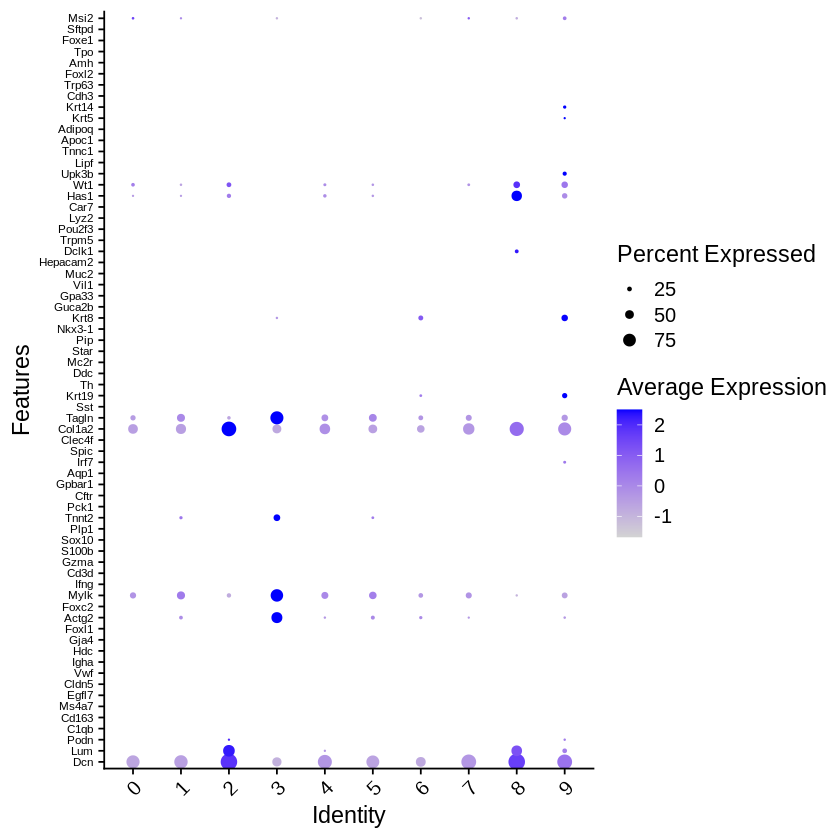

In [22]:
genes <- read.table("Markers-Genes.Mouse.txt",sep="\t")[,1]
DefaultAssay(data) <- "RNA"
DotPlot(data,features=unique(genes),dot.scale=4,dot.min=0.1) + RotatedAxis() + coord_flip() +
theme(axis.text.y=element_text(size=7))

In [17]:
annotations <- read.csv("mouse-gene-annotation.csv",sep="\t")
markers <-  FindAllMarkers(data, only.pos = TRUE, min.diff.pct = 0.25, min.pct = 0.25,
                           logfc.threshold = 0.25)
out <- markers %>%
           rownames_to_column(var = "gene_name") %>%
           left_join(y = unique(annotations[, c("gene_name", "description")]),
           by = c("gene" = "gene_name")) %>%
          dplyr::arrange(p_val_adj)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Warning message in FindMarkers.default(object = data.use, slot = data.slot, counts = counts, :
“No features pass min.diff.pct threshold; returning empty data.frame”
Calculating cluster 5

Warning message in FindMarkers.default(object = data.use, slot = data.slot, counts = counts, :
“No features pass min.diff.pct threshold; returning empty data.frame”
Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



In [18]:
top10 <- out %>%
        group_by(cluster) %>%
        top_n(n=10,wt=avg_log2FC)

In [31]:
top10[top10$cluster==1,]

gene_name,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,description
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
Fos,0.000000e+00,0.6339686,0.913,0.637,0.000000e+00,1,Fos,FBJ osteosarcoma oncogene [Source:MGI Symbol;Acc:MGI:95574]
Atf3,9.626207e-275,0.6315251,0.839,0.532,1.886833e-270,1,Atf3,activating transcription factor 3 [Source:MGI Symbol;Acc:MGI:109384]
Hspa1a,1.416020e-251,0.7627036,0.643,0.310,2.775541e-247,1,Hspa1a,heat shock protein 1A [Source:MGI Symbol;Acc:MGI:96244]
Jun,2.744111e-251,0.5813454,0.865,0.589,5.378732e-247,1,Jun,jun proto-oncogene [Source:MGI Symbol;Acc:MGI:96646]
Zfp36,2.379545e-241,0.5484160,0.839,0.584,4.664146e-237,1,Zfp36,zinc finger protein 36 [Source:MGI Symbol;Acc:MGI:99180]
Btg2,2.021722e-226,0.5524264,0.793,0.520,3.962778e-222,1,Btg2,BTG anti-proliferation factor 2 [Source:MGI Symbol;Acc:MGI:108384]
Socs3,1.110055e-200,0.6010830,0.673,0.373,2.175818e-196,1,Socs3,suppressor of cytokine signaling 3 [Source:MGI Symbol;Acc:MGI:1201791]


In [20]:
output <- "SeuratOut/integrated-allcomplexity-mesoderm.rds"
saveRDS(data,file=output)
saveRDS(out,file='AllMarkers.mesoderm.rds')

Warning message:
“The sort.cell parameter is being deprecated. Please use the order parameter instead for equivalent functionality.”


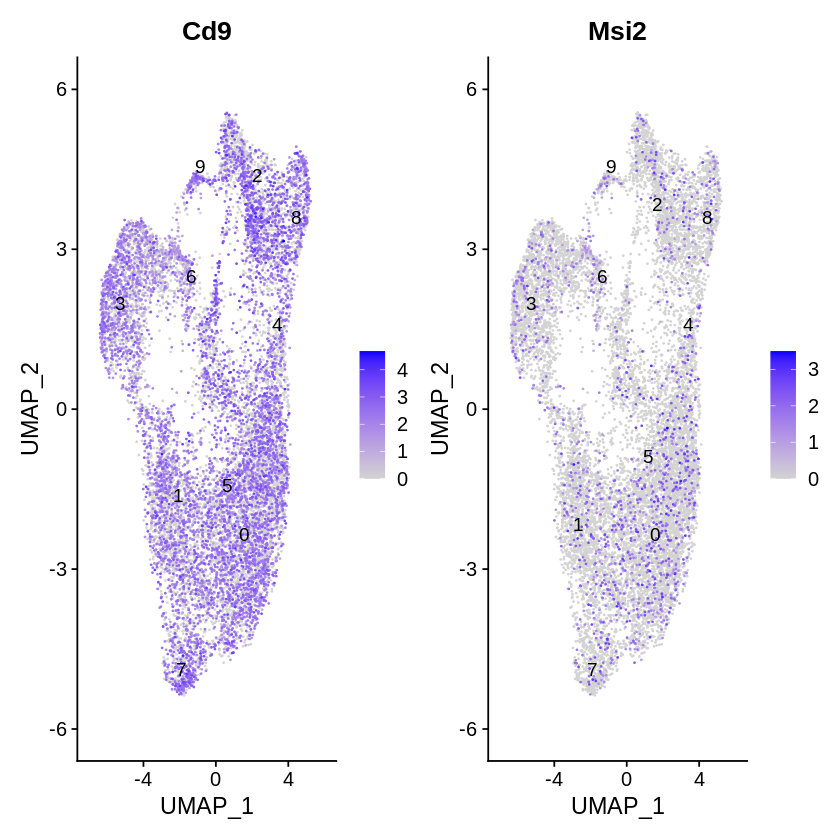

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


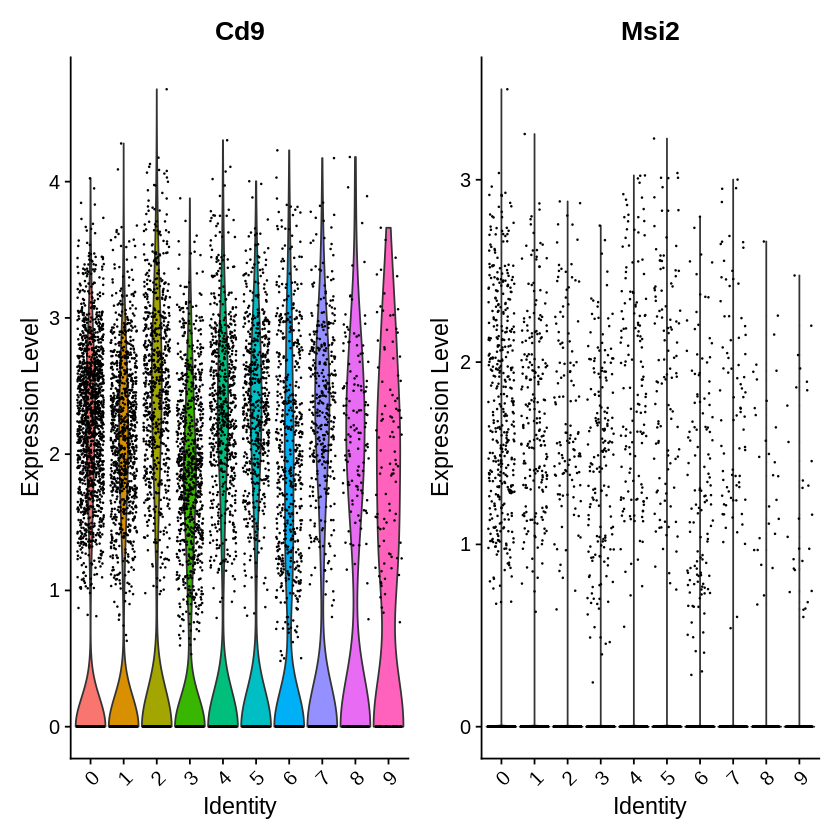

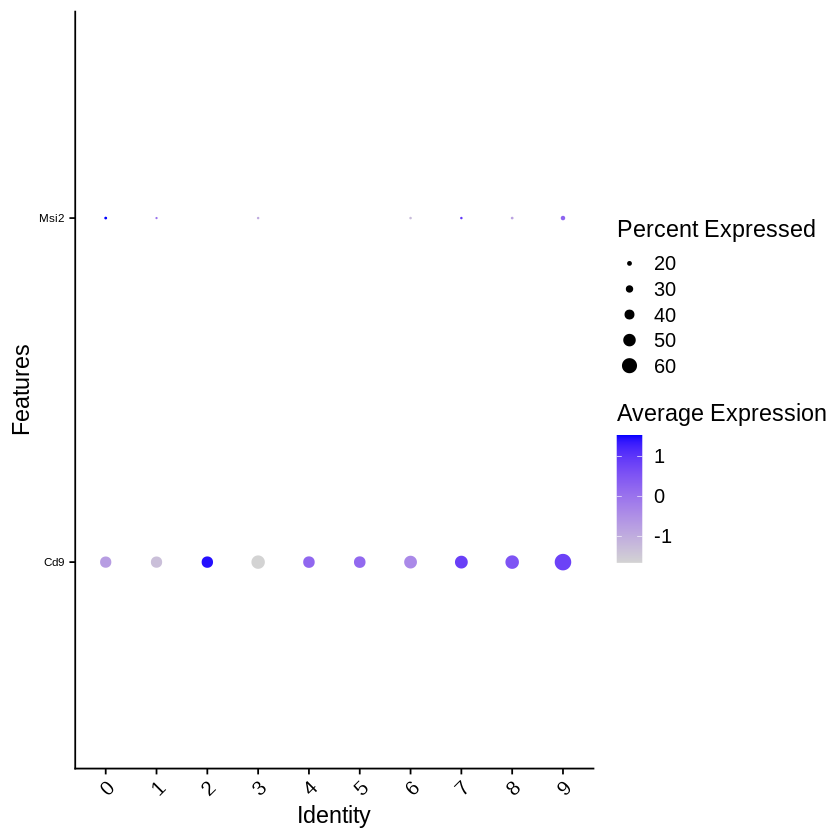

In [27]:
# Psap prosaposin found in smooth muscle layer in SV proteomic paper 10.1016/j.mcpro.2021.100107 
# https://www.genecards.org/cgi-bin/carddisp.pl?gene=PSAP&keywords=PSAP#orthologs
DefaultAssay(data) <- "RNA"
features <- c("Cd9","Msi2")
# Cd9 candidate for smooth muscle layer
 
FeaturePlot(data, 
            reduction = "umap", 
            features = features,
            label = TRUE, 
            sort.cell = TRUE,
            repel = TRUE)
VlnPlot(object = data, 
        features = features)
DotPlot(data,features=features,dot.scale=4,dot.min=0.1) + RotatedAxis() + coord_flip() +
    theme(axis.text.y=element_text(size=7))

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
“The following requested variables were not found: Spink3, Alb, Gin, Serpina3k, Mug1, Apoa4, Dip, Ces1c, Plg”
Warning message:
“Removed 143 rows containing missing values (`geom_point()`).”


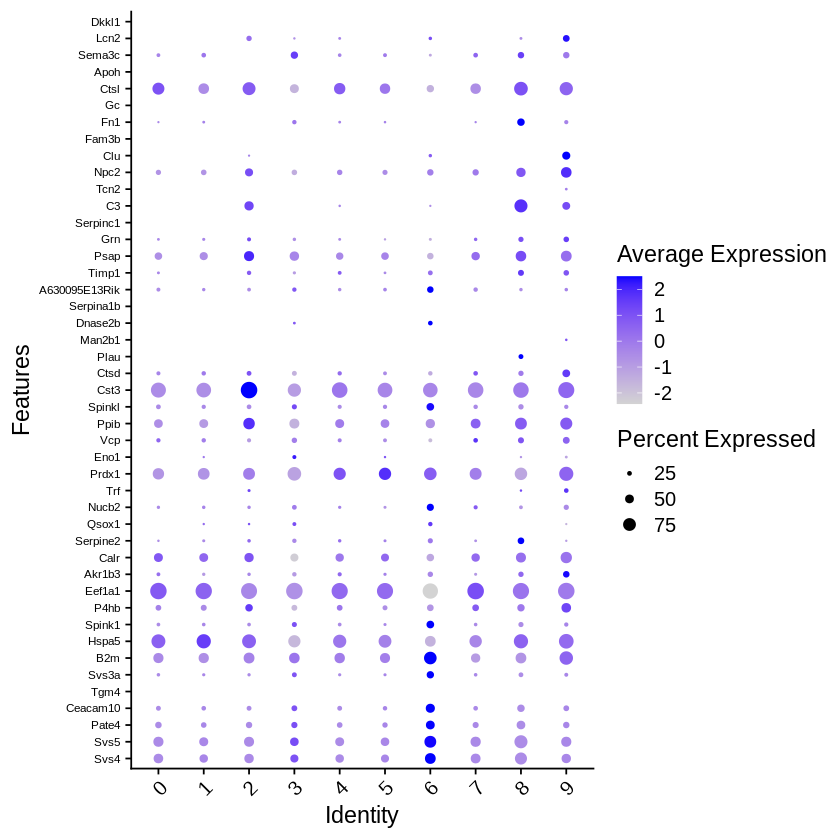

In [28]:
# sets of well characterized genes
genes <- read.table("sv-genes.txt",sep="\t")[,1]
DefaultAssay(data) <- "RNA"
DotPlot(data,features=unique(genes),dot.scale=4,dot.min=0.1) + RotatedAxis() + coord_flip() +
theme(axis.text.y=element_text(size=7))